<a href="https://colab.research.google.com/github/Tajul643/-python-language/blob/master/jkl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving heart (6).csv to heart (6).csv


In [ ]:
df=pd.read_csv('heart (6).csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.shape

(303, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Actual numbers in the database')

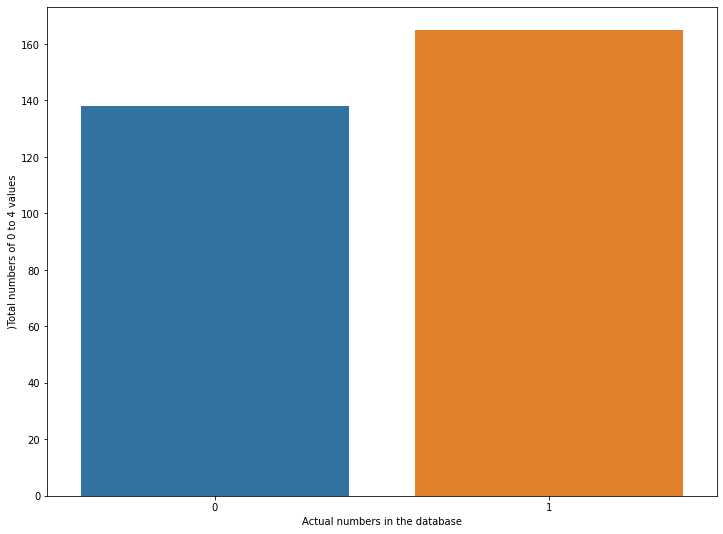

In [ ]:
sns.countplot(df['target'])
plt.ylabel(')Total numbers of 0 to 4 values')
plt.xlabel('Actual numbers in the database')

In [ ]:
df.loc[df["target"]==2,"target"]=1
df.loc[df["target"]==3,"target"]=1
df.loc[df["target"]==4,"target"]=1
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

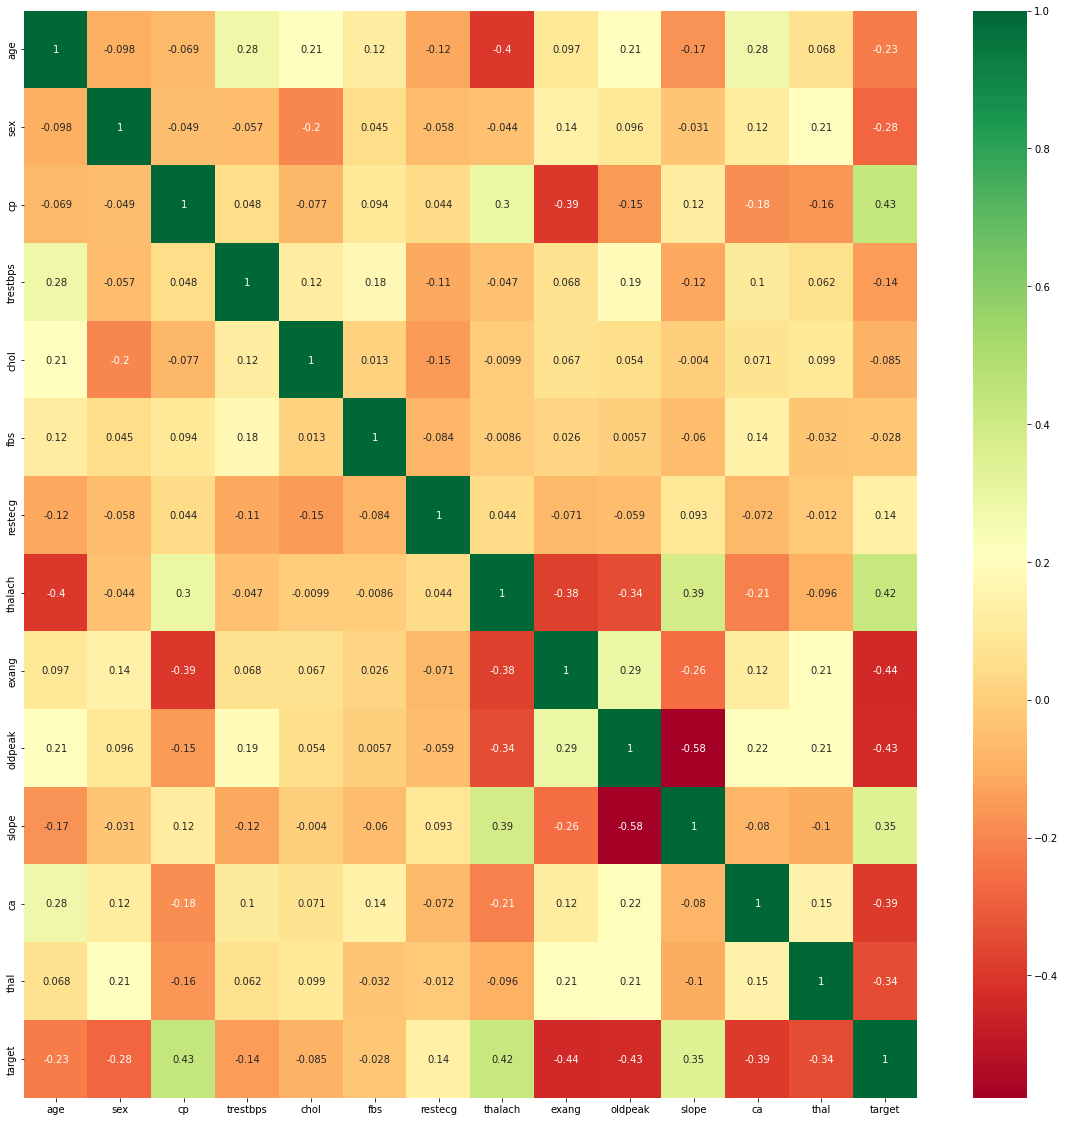

In [ ]:
import seaborn as sns
#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f258ac72610>,
      dtype=object)

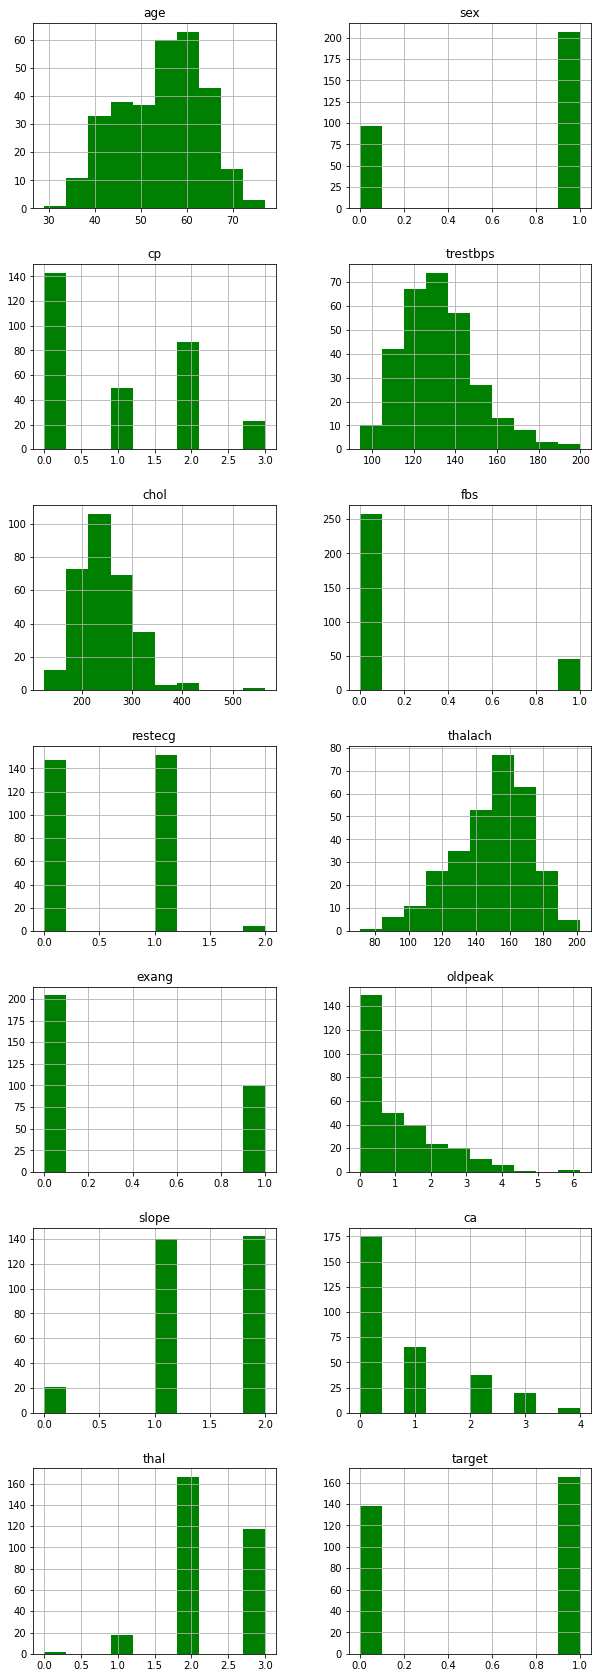

In [ ]:
df.hist(layout = (7, 2),
            figsize = (10, 30),
            color=['green'])

Text(0, 0.5, 'Samples')

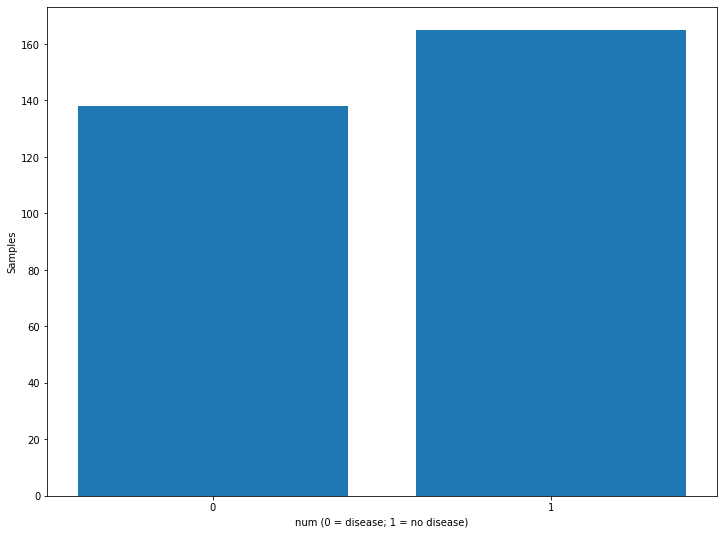

In [ ]:
rcParams['figure.figsize'] = 12, 9
plt.bar(df['target'].unique(), df['target'].value_counts())
plt.xticks([0, 1])
plt.xlabel('num (0 = disease; 1 = no disease)')
plt.ylabel('Samples')

In [ ]:
#Split into training and testing sets

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 45)

In [ ]:
#Machine Learning Algorithms

In [ ]:

#Random Forest Classifier

In [ ]:
print("Training Random Forest")
rf = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf_classifier.fit(X_train, Y_train)
    rf.append(rf_classifier.score(X_test, Y_test))


Training Random Forest


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test, rf_classifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test, rf_classifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, rf_classifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, rf_classifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, rf_classifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test, rf_classifier.predict(X_test)))

Confusion matrix of model 1000 is :
[[21  2]
 [ 5 33]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.94      0.87      0.90        38

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61


Testing accuracy :  88.52459016393442
Sensitivity :  0.8076923076923077
Specificity :  0.9428571428571428
false positive rate :  0.05714285714285714
false negative rate :  0.19230769230769232
Negative Predictive Value :  0.868421052631579
False Discovery rate :  0.08695652173913043
Mean Absolute Error: 0.11475409836065574
Mean Squared Error: 0.11475409836065574
Root Mean Squared Error: 0.3387537429470791
Log_Loss: 3.9634923599874625


In [ ]:
#Plotting Random Forest Results

Text(0.5, 1.0, 'Random Forest')

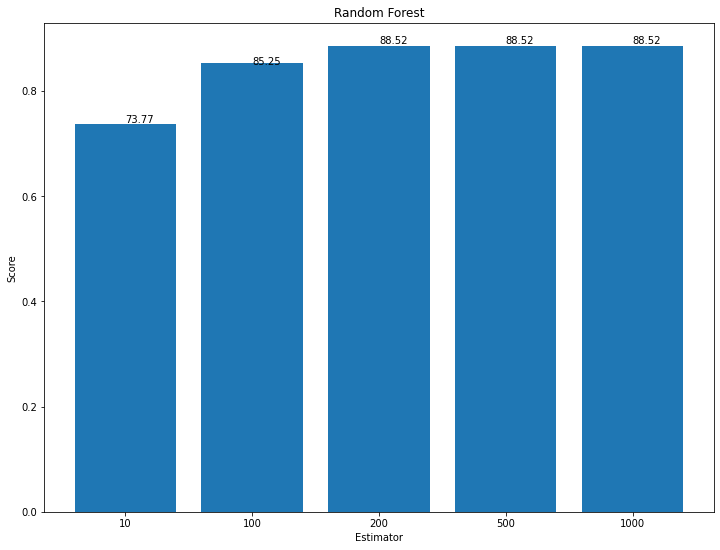

In [ ]:
plt.bar([i for i in range(len(estimators))], rf)
for i in range(len(estimators)):
    plt.text(i, round(rf[i],2), round(rf[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Random Forest')

In [ ]:
#K-Nearest Neighbors Classifiers

In [ ]:
print("Training K-Nearest Neighbors")
knn = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = i)
    knn_classifier.fit(X_train, Y_train)
    knn.append(knn_classifier.score(X_test, Y_test))

Training K-Nearest Neighbors


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test, knn_classifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test, knn_classifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, knn_classifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, knn_classifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, knn_classifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test, knn_classifier.predict(X_test)))

Confusion matrix of model 20 is :
[[15  8]
 [10 28]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.65      0.63        23
           1       0.78      0.74      0.76        38

    accuracy                           0.70        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.71      0.70      0.71        61


Testing accuracy :  70.49180327868852
Sensitivity :  0.6
Specificity :  0.7777777777777778
false positive rate :  0.2222222222222222
false negative rate :  0.4
Negative Predictive Value :  0.7368421052631579
False Discovery rate :  0.34782608695652173
Mean Absolute Error: 0.29508196721311475
Mean Squared Error: 0.29508196721311475
Root Mean Squared Error: 0.5432144762551112
Log_Loss: 10.191874948980884


Text(0.5, 1.0, 'K-Nearest Neighbors')

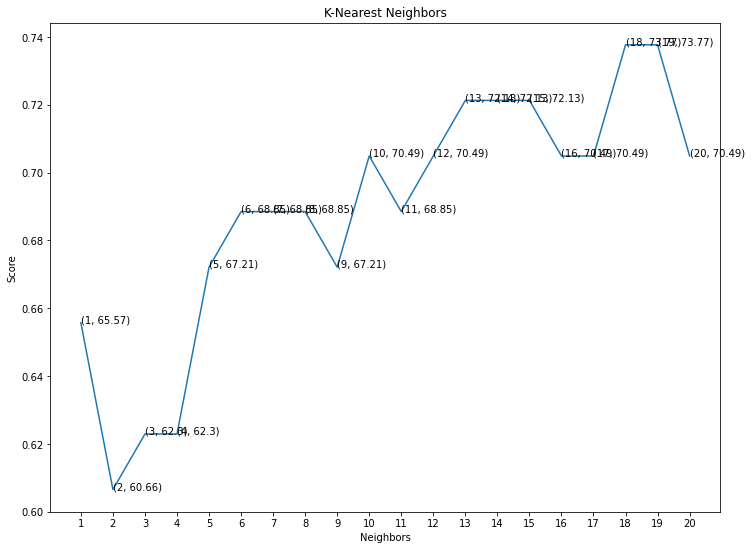

In [ ]:
plt.plot([i for i in range(1, 21)], knn)
for i in range(1, 21):
    plt.text(i, knn[i - 1], (i, round(knn[i - 1]*100, 2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors')

In [ ]:
#Support vector Classifiers

In [ ]:
svc = []
activators = ['poly', 'sigmoid', 'linear', 'rbf']
for i in range(len(activators)):
    SVclassifier = SVC(kernel = activators[i])
    SVclassifier.fit(X_train, Y_train)
    svc.append(SVclassifier.score(X_test, Y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test,  SVclassifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test,  SVclassifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, SVclassifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,  SVclassifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,  SVclassifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test,  SVclassifier.predict(X_test)))

Confusion matrix of model 3 is :
[[11 12]
 [ 4 34]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.74      0.89      0.81        38

    accuracy                           0.74        61
   macro avg       0.74      0.69      0.69        61
weighted avg       0.74      0.74      0.72        61


Testing accuracy :  73.77049180327869
Sensitivity :  0.7333333333333333
Specificity :  0.7391304347826086
false positive rate :  0.2608695652173913
false negative rate :  0.26666666666666666
Negative Predictive Value :  0.8947368421052632
False Discovery rate :  0.5217391304347826
Mean Absolute Error: 0.26229508196721313
Mean Squared Error: 0.26229508196721313
Root Mean Squared Error: 0.5121475197315839
Log_Loss: 9.059508483405464


Text(0.5, 1.0, 'Support Vector Classifier')

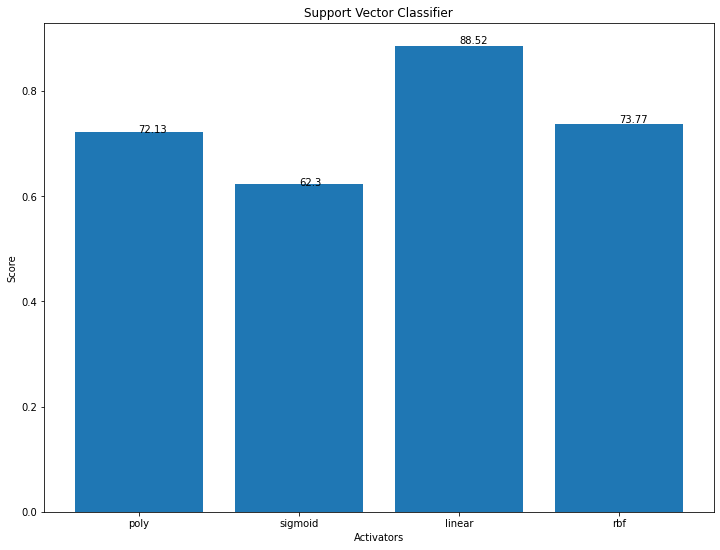

In [ ]:
plt.bar(activators, svc)
for i in range(len(activators)):
    plt.text(i, round(svc[i],2), round(svc[i]*100,2))
plt.xlabel('Activators')
plt.ylabel('Score')
plt.title('Support Vector Classifier')

In [ ]:
# Ada Boost Classifier

In [ ]:
abc = []
estimators = [5, 10, 50, 100, 200]
for i in range(len(estimators)):
    ABclassifier = AdaBoostClassifier(n_estimators = estimators[i],
                            learning_rate = 1)
    ABclassifier.fit(X_train, Y_train)
    abc.append(ABclassifier.score(X_test, Y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test,  ABclassifier.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test,  ABclassifier.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, ABclassifier.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, ABclassifier.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,  ABclassifier.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test,  ABclassifier.predict(X_test)))

Confusion matrix of model 4 is :
[[19  4]
 [ 9 29]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        23
           1       0.88      0.76      0.82        38

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61


Testing accuracy :  78.68852459016394
Sensitivity :  0.6785714285714286
Specificity :  0.8787878787878788
false positive rate :  0.12121212121212122
false negative rate :  0.32142857142857145
Negative Predictive Value :  0.7631578947368421
False Discovery rate :  0.17391304347826086
Mean Absolute Error: 0.21311475409836064
Mean Squared Error: 0.21311475409836064
Root Mean Squared Error: 0.4616435357484827
Log_Loss: 7.360775270878026


Text(0.5, 1.0, 'Ada Boost Classifier')

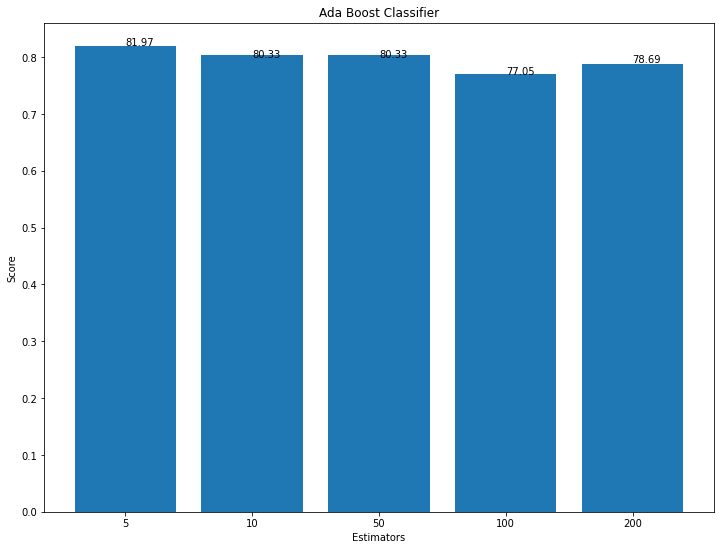

In [ ]:
plt.bar([i for i in range(len(estimators))], abc)
for i in range(len(estimators)):
    plt.text(i, round(abc[i],2), round(abc[i]*100,2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Ada Boost Classifier')

In [ ]:
# Multi Layer perceptron

In [ ]:
mlp = []
hidden_units = [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500]

for i in range(len(hidden_units)):
    MLPc = MLPClassifier(hidden_layer_sizes = (hidden_units[i],))
    MLPc.fit(X_train, Y_train)
    mlp.append(MLPc.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test, MLPc.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test, MLPc.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, MLPc.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, MLPc.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, MLPc.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test, MLPc.predict(X_test)))

Confusion matrix of model 10 is :
[[21  2]
 [ 9 29]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.94      0.76      0.84        38

    accuracy                           0.82        61
   macro avg       0.82      0.84      0.82        61
weighted avg       0.85      0.82      0.82        61


Testing accuracy :  81.9672131147541
Sensitivity :  0.7
Specificity :  0.9354838709677419
false positive rate :  0.06451612903225806
false negative rate :  0.3
Negative Predictive Value :  0.7631578947368421
False Discovery rate :  0.08695652173913043
Mean Absolute Error: 0.18032786885245902
Mean Squared Error: 0.18032786885245902
Root Mean Squared Error: 0.4246502900652006
Log_Loss: 6.228330156375047


Text(0.5, 1.0, 'Multi-Layer Perceptron')

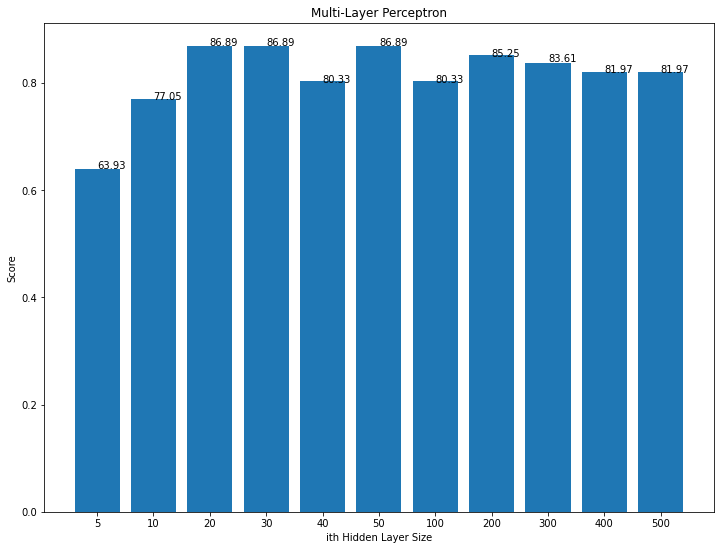

In [ ]:
plt.bar([i for i in range(len(hidden_units))], mlp)
for i in range(len(hidden_units)):
    plt.text(i, round(mlp[i],2), round(mlp[i]*100,2))
plt.xticks(ticks = [i for i in range(len(hidden_units))], labels = [str(hidden) for hidden in hidden_units])
plt.xlabel('ith Hidden Layer Size')
plt.ylabel('Score')
plt.title('Multi-Layer Perceptron')

In [ ]:
 # Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state = 42)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn import metrics
from sklearn import metrics

print('Confusion matrix of model',i , 'is :')
cm = confusion_matrix(Y_test, tree.predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print(cm)
print()
result1 = classification_report(Y_test, tree.predict(X_test))
print("Classification Report : ",)
print (result1)
print()
var = ((TP + TN)/(TP + TN + FP + FN)) *100
print('Testing accuracy : ',var)
print('Sensitivity : ', TP/(TP+FN))
print('Specificity : ', TN/(TN+FP))
print('false positive rate : ', FP/(FP+TN))
print('false negative rate : ', FN/(FN+TP))
print('Negative Predictive Value : ', TN/(TN+FN))
print('False Discovery rate : ', FP/(TP+FP))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, tree.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, tree.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, tree.predict(X_test))))
print('Log_Loss:', metrics.log_loss(Y_test, tree.predict(X_test)))



Confusion matrix of model 10 is :
[[16  7]
 [ 8 30]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.81      0.79      0.80        38

    accuracy                           0.75        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.76      0.75      0.76        61


Testing accuracy :  75.40983606557377
Sensitivity :  0.6666666666666666
Specificity :  0.8108108108108109
false positive rate :  0.1891891891891892
false negative rate :  0.3333333333333333
Negative Predictive Value :  0.7894736842105263
False Discovery rate :  0.30434782608695654
Mean Absolute Error: 0.2459016393442623
Mean Squared Error: 0.2459016393442623
Root Mean Squared Error: 0.4958847036804647
Log_Loss: 8.493233493535598


<h3>Linear Classifiers with stochastic gradient descent training</h3>

In [ ]:
sgd = []
loss_func = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
       'squared_loss', 'epsilon_insensitive','squared_epsilon_insensitive']
for i in range(len(loss_func)):
    linearc = SGDClassifier(loss = loss_func[i])
    linearc.fit(X_train, Y_train)
    sgd.append(linearc.score(X_test, Y_test))

Text(0.5, 1.0, 'Linear Classifiers')

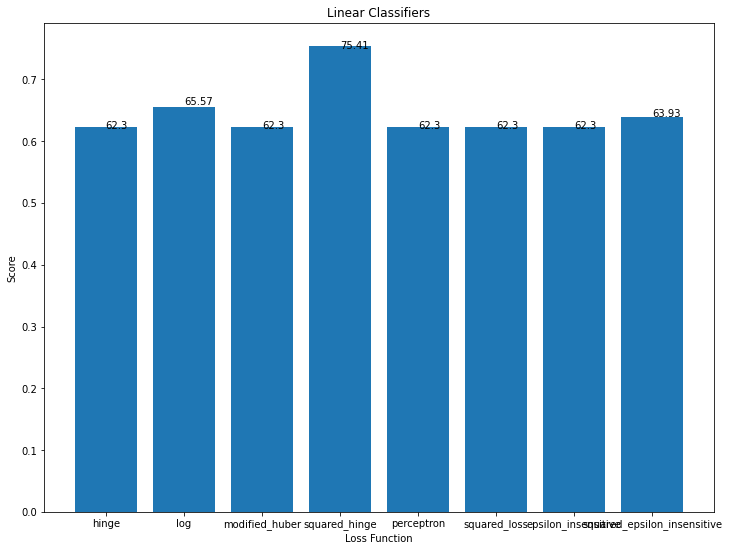

In [ ]:
plt.bar(loss_func, sgd)
for i in range(len(loss_func)):
    plt.text(i, round(sgd[i],2), round(sgd[i]*100,2))
plt.xlabel('Loss Function')
plt.ylabel('Score')
plt.title('Linear Classifiers')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

83.47 %


In [ ]:
 #neural_network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=1190)

Epoch 1/1190
8/8 [==============================] - 1s 2ms/step - loss: 6.1154 - accuracy: 0.4380
Epoch 2/1190
8/8 [==============================] - 0s 2ms/step - loss: 4.9855 - accuracy: 0.3802
Epoch 3/1190
8/8 [==============================] - 0s 4ms/step - loss: 4.4317 - accuracy: 0.4174
Epoch 4/1190
8/8 [==============================] - 0s 2ms/step - loss: 4.0243 - accuracy: 0.3760
Epoch 5/1190
8/8 [==============================] - 0s 3ms/step - loss: 3.6952 - accuracy: 0.4008
Epoch 6/1190
8/8 [==============================] - 0s 2ms/step - loss: 3.3295 - accuracy: 0.4421
Epoch 7/1190
8/8 [==============================] - 0s 2ms/step - loss: 2.9974 - accuracy: 0.4174
Epoch 8/1190
8/8 [==============================] - 0s 2ms/step - loss: 2.8453 - accuracy: 0.4174
Epoch 9/1190
8/8 [==============================] - 0s 2ms/step - loss: 2.7005 - accuracy: 0.4256
Epoch 10/1190
8/8 [==============================] - 0s 2ms/step - loss: 2.5780 - accuracy: 0.4339
Epoch 11/1190
8/8 [

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
drounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = drounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 85.25 %
